In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
!unzip '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/train.zip' -d '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/train'

In [ ]:
!unzip '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test.zip' -d '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test'

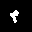

In [9]:
from IPython.display import Image
Image('/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test/id_1000_label_24.png')

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd

from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import img_to_array, load_img, array_to_img
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential

np.random.seed(42)
#np.set_printoptions(threshold=np.inf)

In [ ]:
train_arrays = []

train_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/train/'

for file in os.listdir(train_path):
    try:
        char = load_img(train_path + file, target_size=(32, 32), color_mode='grayscale')
        char_arr = img_to_array(char) / 31
        train_arrays.append(char_arr)
    except:
        print(f'Error for file: {file}')

print(f'{len(train_arrays)} pictures converted')

13440 pictures converted


In [43]:
test_arrays = []
test_array_labels = []

test_path = '/content/drive/MyDrive/general_assembly/code/capstone/arabic_characters/test/'

for file in os.listdir(test_path):
    try:
        char = load_img(test_path + file, target_size=(32, 32), color_mode='grayscale')
        char_arr = img_to_array(char) / 31
        test_arrays.append(char_arr)
        test_array_labels.append(file[-6:-4].replace('_', ''))
    except:
        print(f'Error for file: {file}')

print(f'{len(test_arrays)} pictures converted')

3360 pictures converted


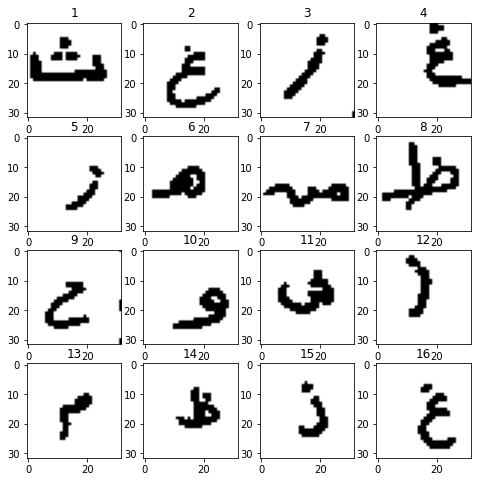

In [44]:
fig = plt.figure(figsize=(8,8))
for i in range(1,17):
    fig.add_subplot(4,4,i)
    plt.title(label=i)
    plt.imshow(np.squeeze(test_arrays[i]), cmap='Greys')
plt.show()

In [ ]:
test_list[1][-6:-4]

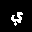

In [ ]:
array_to_img(train_arrays[0])

In [ ]:
new = np.squeeze(train_arrays[0])

In [ ]:
new.shape

(32, 32)

In [ ]:
np.squeeze(train_arrays[0]).shape

(32, 32)

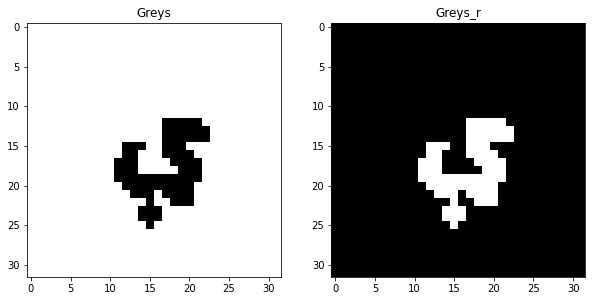

In [ ]:
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1,2,1)
plt.title(label='Greys')
plt.imshow(new, cmap='Greys')

fig.add_subplot(1,2,2)
plt.title(label='Greys_r')
plt.imshow(new, cmap='Greys_r');

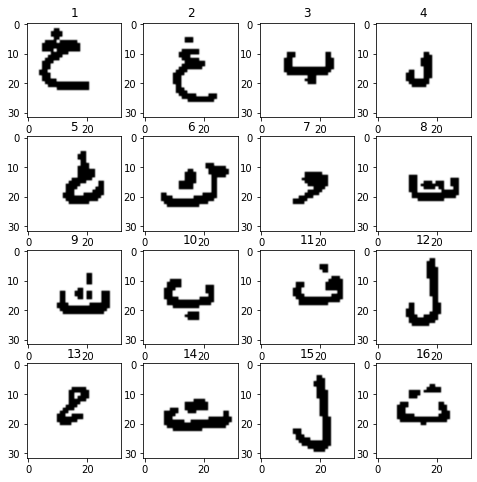

In [ ]:
fig = plt.figure(figsize=(8,8))
for i in range(1,17):
    fig.add_subplot(4,4,i)
    plt.title(label=i)
    plt.imshow(np.squeeze(train_arrays[i]), cmap='Greys')
plt.show()

In [ ]:
train_arrays = to_categorical(train_arrays)

In [ ]:
train_arrays[0].shape

(32, 32, 1)

In [ ]:
len(train_arrays)

13440

In [ ]:
train_arrays[0][0][0]

array([0.], dtype=float32)

In [ ]:
test_list = os.listdir('arabic_chars/test')

In [ ]:
test_list[0:10]

['id_2865_label_5.png',
 'id_2881_label_13.png',
 'id_151_label_20.png',
 'id_2625_label_25.png',
 'id_842_label_1.png',
 'id_3067_label_22.png',
 'id_2363_label_6.png',
 'id_2494_label_15.png',
 'id_2807_label_4.png',
 'id_930_label_17.png']

In [ ]:
test_list[1][-6:-4]

'13'

Train: X=(60000, 28, 28), y=(60000,)
Test: X=(10000, 28, 28), y=(10000,)


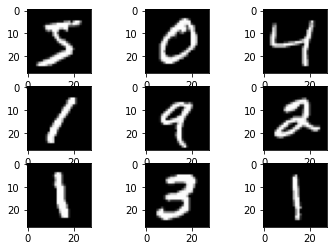

In [ ]:
# example of loading the mnist dataset
from keras.datasets import mnist
from matplotlib import pyplot
# load dataset
(trainX, trainy), (testX, testy) = mnist.load_data()
# summarize loaded dataset
print('Train: X=%s, y=%s' % (trainX.shape, trainy.shape))
print('Test: X=%s, y=%s' % (testX.shape, testy.shape))
# plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i], cmap=pyplot.get_cmap('gray'))
# show the figure
pyplot.show()

In [ ]:
# load train and test dataset
def load_dataset():
	# load dataset
	(trainX, trainY), (testX, testY) = mnist.load_data()
	# reshape dataset to have a single channel
	trainX = trainX.reshape((trainX.shape[0], 28, 28, 1))
	testX = testX.reshape((testX.shape[0], 28, 28, 1))
	# one hot encode target values
	trainY = to_categorical(trainY)
	testY = to_categorical(testY)
	return trainX, trainY, testX, testY

In [ ]:
# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm